In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
# Liste des marques connues
known_brands = [
    'Mercedes-Benz', 'BMW', 'Audi', 'Volkswagen', 'Renault', 'Peugeot', 
    'Citroën', 'Toyota', 'Ford', 'Fiat', 'Hyundai', 'Nissan', 'Kia', 'Honda', 
    'Mazda', 'Chevrolet', 'Volvo', 'Opel', 'Jeep', 'Porsche', 'Jaguar', 
    'Land Rover', 'Tesla', 'Chrysler', 'Subaru', 'Lexus', 'Mitsubishi', 
    'Buick', 'Acura', 'Cadillac', 'Lincoln', 'Infiniti', 'Dodge', 'Ram', 
    'GMC', 'Suzu', 'Peugeot', 'Haval', 'Isuzu', 'Chery', 'SsangYong', 'MG', 
    'Zotye', 'Tata', 'Mahindra', 'Maserati', 'Ferrari', 'Lamborghini', 'Aston Martin', 
    'Rolls-Royce', 'Bentley', 'Bugatti', 'McLaren', 'Pagani', 'Koenigsegg', 'Fisker', 
    'Rimac', 'Polestar', 'Lucid Motors', 'NIO', 'BYD', 'XPeng', 'Rivian', 'Lordstown Motors',
    'Lotus', 'Alfa Romeo', 'Saab', 'Spyker', 'Peugeot', 'Wiesmann', 'Caterham', 'Morgan', 
    'Smart', 'Mini', 'Daihatsu', 'Suzuki', 'Fiat', 'Datsun', 'Tata Motors', 'Mahindra', 'Geely',
    'Great Wall Motors', 'Changan', 'Dongfeng', 'BAIC', 'SAIC Motor', 'Hino', 'Isuzu', 'Porsche',
    'Pagani', 'Fisker', 'Lincoln', 'Genesis', 'Pagani', 'Pininfarina', 'Honda', 'Mitsuoka', 
    'Mancuso', 'Peugeot', 'Perodua', 'Hino', 'Lada', 'Lynk & Co', 'Volvo', 'Karma Automotive',
    'Spyker', 'Vauxhall', 'Saturn', 'Pontiac', 'Opel', 'Holden', 'Eagle', 'Sterling', 'Chrysler',
    'Bristol', 'Noble', 'Pagani', 'W Motors', 'Bajaj', 'EMW', 'Zenos Cars', 'Caterham', 'Tatra',
    'Ruf', 'Borgward', 'Ginetta', 'Radical Sportscars', 'KTM', 'Troller', 'Bajaj', 'Hennessey', 
    'Vauxhall', 'SRT', 'Daimler', 'Pininfarina', 'Daimler', 'Lancia', 'Morgan', 'Tesla', 'Fiat',"skoda","Seat","Fiat"
]

all_car_brands = [
    'Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Buick', 'Cadillac', 
    'Chevrolet', 'Chrysler', 'Citroën', 'Dacia', 'Daihatsu', 'Dodge', 'Ferrari', 
    'Fiat', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 
    'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 
    'Maserati', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 
    'Nissan', 'Pagani', 'Peugeot', 'Porsche', 'RAM', 'Renault', 'Rolls-Royce', 
    'Saab', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 
    'Wiesmann', 'Zastava', 'Chery', 'Haval', 'Mahindra', 'Proton', 'SsangYong',
    'BYD', 'Perodua', 'Tata', 'BAIC', 'Great Wall', 'Fisker', 'Rivian', 'Lucid', 
    'Datsun', 'Meyers Manx', 'Morgan', 'Peel', 'Spykers', 'Vauxhall', 'Lancia', 
    'Opel', 'Borgward', 'Ginetta', 'Koenigsegg', 'Pagani', 'Ruf', 'Caterham', 
    'Bitter', 'TVR', 'Pininfarina', 'Scania', 'Tata Motors', 'Chrysler', 
    'Lada', 'Hino', 'Isuzu', 'Mitsuoka', 'Hyundai Genesis', 'Suzuki', 'Wuling', 
    'Zotye', 'SAIC', 'Dongfeng', 'Geely', 'Xpeng', 'Nio', 'BYTON', 'Rimac', 
    'Lucid Motors', 'Lordstown Motors', 'Rivian', 'Polestar', 'Faraday Future', 
    'Workhorse', 'Bollinger Motors', 'Fisker Automotive', 'Arcimoto', 'Automobili Pininfarina', 
    'Aspark', 'Elio Motors', 'Venturi', 'Farday Future', 'Mullen Automotive', 'Zenvo', 
    'Burtin', 'Donkervoort', 'Lotus Cars', 'Spyker', 'De Tomaso', 'Cisitalia', 'Tucker', 
    'GMC', 'Chevrolet', 'Daimler', 'W Motors', 'Isdera', 'DeLorean', 'Hummer', 'Pininfarina', 
    'Subaru', 'Aston Martin', 'Bentley', 'Daimler', 'Fisker', 'Lotus', 'Lincoln', 'Hindustan', 
    'Jaguar Land Rover', 'McLaren', 'Mitsubishi', 'Packard', 'Panther Westwinds', 'Peugeot', 
    'Porsche', 'Renault', 'Rolls-Royce', 'Saab', 'Skoda', 'Spyker', 'Tata Motors', 'Tesla', 
    'Toyota', 'Volkswagen', 'Volvo', 'Zagato', 'Karma', 'Prodrive', 'Vuhl', 'Vaz', 'Vencer', 
    'Chrysler', 'Vauxhall', 'Zotye', 'Nissan', 'Foton', 'Sever', 'Aston Martin Lagonda', 
    'Brammo', 'DaimlerChrysler', 'Penske', 'Peugeot-Citroën', 'Brabus', 'Pagani', 'Mclaren', 
    'Tesla', 'Rivian', 'Lucid Motors', 'Mitsubishi', 'Caterham', 'Opel', 'Proton', 'Fisker', 
    'GMC', 'Aston Martin', 'Chevrolet', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Kia', 'Nissan', 
    'Peugeot', 'Renault', 'Skoda', 'Volkswagen', 'Toyota', 'BMW', 'Mazda', 'Porsche', 'Audi', 
    'McLaren', 'Koenigsegg', 'Bugatti', 'Rimac', 'Rolls-Royce', 'Bentley', 'Jaguar', 'Lincoln', 
    'Land Rover', 'Subaru', 'Buggati', 'Dacia', 'Datsun', 'SsangYong', 'Chery', 'Wuling', 'Haval', 
    'Geely', 'Great Wall', 'BYD', 'Chrysler', 'Ram', 'Fiat', 'Chery', 'Mitsubishi', 'Rivian', 'Lucid',"Seat",
]


def extract_marque_modele(name):
    """
    Extrait la marque et le modèle d'un nom donné.
    La fonction ne tient pas compte de la casse.
    """
    name_lower = name.lower()  # Convert the name to lowercase
    for marque in all_car_brands:
        if name_lower.startswith(marque.lower()):  # Compare in lowercase
            return marque, name[len(marque):].strip()
    return "Inconnu", name  # Marque inconnue ou non listée


# URL de base
base_url = 'https://www.automobile.tn/fr/occasion/'
cars = []
page = 1
while page < 30:  # Boucle infinie, on s'arrête manuellement
    print(f"Scraping la page {page}...")
    
    # Construire l'URL de la page actuelle
    url = f"{base_url}{page}"
    
    # Envoyer une requête GET
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Erreur lors du chargement de la page {page}.")
        break

    # Parser le contenu de la page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Trouver tous les articles (voitures)
    articles = soup.find_all('div', class_='occasion-item-v2')
    
    # Si aucun article n'est trouvé, arrêter la boucle
    if not articles:
        print("Aucune voiture trouvée sur cette page. Arrêt du scraping.")
        break
    
    # Extraire les informations pour chaque voiture
    for article in articles:
        try:
            # Nom (Marque et Modèle)
            name = article.find('h2').text.strip()
            
            # Extraire Marque et Modèle
            marque, modele = extract_marque_modele(name)

            # Prix
            price = article.find('div', class_='price').text.strip()

            # Kilométrage
            mileage = article.find('li', class_='road').text.strip()

            # Année
            year = article.find('li', class_='year').text.strip()

            # Carburant (Essence, Diesel, etc.)
            fuel = article.find('li', class_='fuel').text.strip()

            # Boîte de vitesses (Manuelle ou Automatique)
            gearbox = article.find('li', class_='boite').text.strip()

            # Ajouter les données dans la liste
            cars.append({
                'Marque': marque,
                'Modèle': modele,
                'Prix': price,
                'Kilométrage': mileage,
                'Année': year,
                'Carburant': fuel,
                'Boite_de_vitesses': gearbox
            })
        except AttributeError as e:
            print(f"Erreur lors de l'extraction d'un article : {e}")
            continue

    # Passer à la page suivante
    page += 1

# Afficher les résultats
for car in cars:
    print(car)
print(len(cars))

Scraping la page 1...
Scraping la page 2...
Scraping la page 3...
Scraping la page 4...
Scraping la page 5...
Scraping la page 6...
Scraping la page 7...
Scraping la page 8...
Scraping la page 9...
Scraping la page 10...
Scraping la page 11...
Scraping la page 12...
Scraping la page 13...
Scraping la page 14...
Scraping la page 15...
Scraping la page 16...
Scraping la page 17...
Scraping la page 18...
Scraping la page 19...
Scraping la page 20...
Scraping la page 21...
Scraping la page 22...
Scraping la page 23...
Scraping la page 24...
Scraping la page 25...
Scraping la page 26...
Scraping la page 27...
Scraping la page 28...
Scraping la page 29...
{'Marque': 'Hyundai', 'Modèle': 'Grand i10', 'Prix': '47 500 DT', 'Kilométrage': '56 000 km', 'Année': '2022', 'Carburant': 'Essence', 'Boite_de_vitesses': 'Automatique'}
{'Marque': 'Skoda', 'Modèle': 'Fabia', 'Prix': '49 900 DT', 'Kilométrage': '79 000 km', 'Année': '2022', 'Carburant': 'Essence', 'Boite_de_vitesses': 'Manuelle'}
{'Marque'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


ModuleNotFoundError: No module named 'sklearn'

In [13]:
# Convertir la liste en DataFrame
df = pd.DataFrame(cars)
cars_csv = df.to_csv('scrapped_cars.csv', encoding='utf-8', index=False)  # Exclude index
cars_dataset = pd.read_csv('scrapped_cars.csv')

# Afficher un aperçu des données
print("\nDonnées extraites :")
print(df.head())

# Function to clean the 'Prix' column
def clean_price(price):
    try:
        # Remove 'DT', spaces, and convert to numeric
        return float(price.replace("DT", "").replace(" ", ""))
    except:
        return None  # Return None for malformed values

# Function to clean the 'Kilométrage' column
def clean_mileage(mileage):
    try:
        # Remove 'km', spaces, and convert to numeric
        return float(mileage.replace("km", "").replace(" ", ""))
    except:
        return None

# Function to clean the 'Année' column
def clean_year(year):
    try:
        # Convert to integer
        return int(year)
    except:
        return None

#Apply on df for plotting
df['Prix'] = df['Prix'].apply(clean_price)
df['Kilométrage'] = df['Kilométrage'].apply(clean_mileage)
df['Année'] = df['Année'].apply(clean_year)
# Apply the cleaning functions to each column
cars_dataset['Prix'] = cars_dataset['Prix'].apply(clean_price)
cars_dataset['Kilométrage'] = cars_dataset['Kilométrage'].apply(clean_mileage)
cars_dataset['Année'] = cars_dataset['Année'].apply(clean_year)

# Afficher un aperçu des données Nettoyées
print("\nDonnées Nettoyées:")
print(cars_dataset.head())



Données extraites :
          Marque                           Modèle        Prix Kilométrage  \
0     Volkswagen                           Golf 8  114 000 DT   41 000 km   
1     Land Rover  Range Rover V8 4.2 SUPERCHARGED  189 000 DT   60 000 km   
2        Hyundai                        Grand i10   38 500 DT   79 500 km   
3          Haval                               H6   70 000 DT   89 000 km   
4  Mercedes-Benz                               ML   80 000 DT  160 000 km   

  Année Carburant Boite_de_vitesses  
0  2020   Essence          Manuelle  
1  2010   Essence       Automatique  
2  2021   Essence          Manuelle  
3  2019   Essence       Automatique  
4  2010    Diesel       Automatique  

Données Nettoyées:
          Marque                           Modèle      Prix  Kilométrage  \
0     Volkswagen                           Golf 8  114000.0      41000.0   
1     Land Rover  Range Rover V8 4.2 SUPERCHARGED  189000.0      60000.0   
2        Hyundai                        

In [14]:
#inspecting the first five rows of the dataframe
cars_dataset.head()

,Marque,Modèle,Prix,Kilométrage,Année,Carburant,Boite_de_vitesses
0,Volkswagen,Golf 8,114000.0,41000.0,2020,Essence,Manuelle
1,Land Rover,Range Rover V8 4.2 SUPERCHARGED,189000.0,60000.0,2010,Essence,Automatique
2,Hyundai,Grand i10,38500.0,79500.0,2021,Essence,Manuelle
3,Haval,H6,70000.0,89000.0,2019,Essence,Automatique
4,Mercedes-Benz,ML,80000.0,160000.0,2010,Diesel,Automatique


In [15]:
#inspecting the number of rows and columns
cars_dataset.shape

(348, 7)

In [16]:
# getting some information about the Scraped data
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marque             348 non-null    object 
 1   Modèle             348 non-null    object 
 2   Prix               347 non-null    float64
 3   Kilométrage        348 non-null    float64
 4   Année              348 non-null    int64  
 5   Carburant          348 non-null    object 
 6   Boite_de_vitesses  348 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 19.2+ KB


In [17]:
# checking the number of missing values
cars_dataset.isnull().sum()

Marque               0
Modèle               0
Prix                 1
Kilométrage          0
Année                0
Carburant            0
Boite_de_vitesses    0
dtype: int64

In [18]:
# cheking the distrubtion of catagorical data
print(cars_dataset.Carburant.value_counts())
print(cars_dataset.Boite_de_vitesses.value_counts())

Carburant
Essence    247
Diesel      71
Hybride     30
Name: count, dtype: int64
Boite_de_vitesses
Automatique    204
Manuelle       144
Name: count, dtype: int64


In [19]:
# Drop rows with missing or invalid values
cars_dataset = cars_dataset.dropna(subset=['Prix', 'Kilométrage', 'Année'])

# Reset the index after dropping rows
cars_dataset = cars_dataset.reset_index(drop=True)

# Fill missing values in categorical columns with 'Unknown'
for col in ['Marque', 'Modèle']:
    if cars_dataset[col].isnull().sum() > 0:
        cars_dataset[col].fillna('Unknown', inplace=True)

    
# Shuffle the Data
cars_dataset = cars_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Display cleaned data
print("\nDonnées nettoyées :")
print(cars_dataset.head())



Données nettoyées :
       Marque          Modèle      Prix  Kilométrage  Année Carburant  \
0       Mazda            CX-9  119000.0      70000.0   2017   Essence   
1  Mitsubishi          Pajero  107000.0     200000.0   2016   Essence   
2        Fiat          Ducato   45000.0     211000.0   2012    Diesel   
3      Nissan        Townstar   63000.0      14924.0   2023   Essence   
4      Suzuki  Jimny 3 portes   75000.0      75000.0   2020   Essence   

  Boite_de_vitesses  
0       Automatique  
1       Automatique  
2          Manuelle  
3          Manuelle  
4          Manuelle  


In [20]:
# checking the number of missing values
cars_dataset.isnull().sum()

Marque               0
Modèle               0
Prix                 0
Kilométrage          0
Année                0
Carburant            0
Boite_de_vitesses    0
dtype: int64

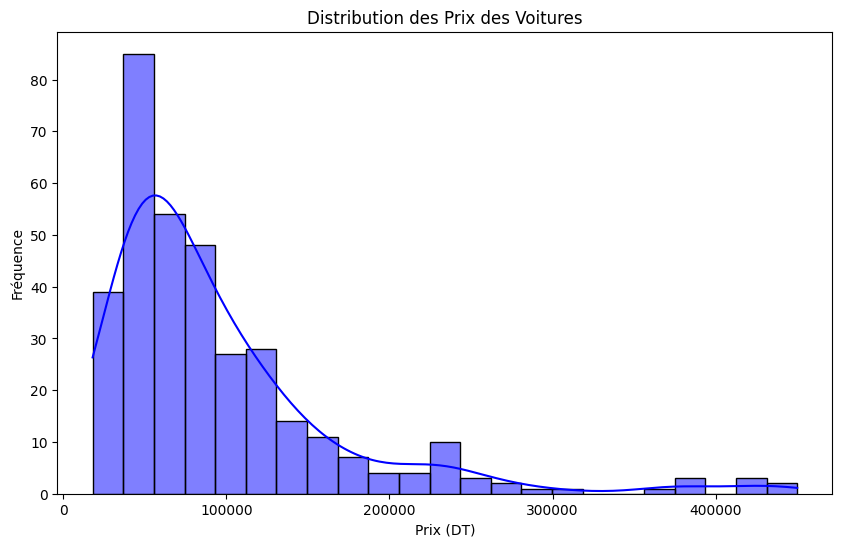

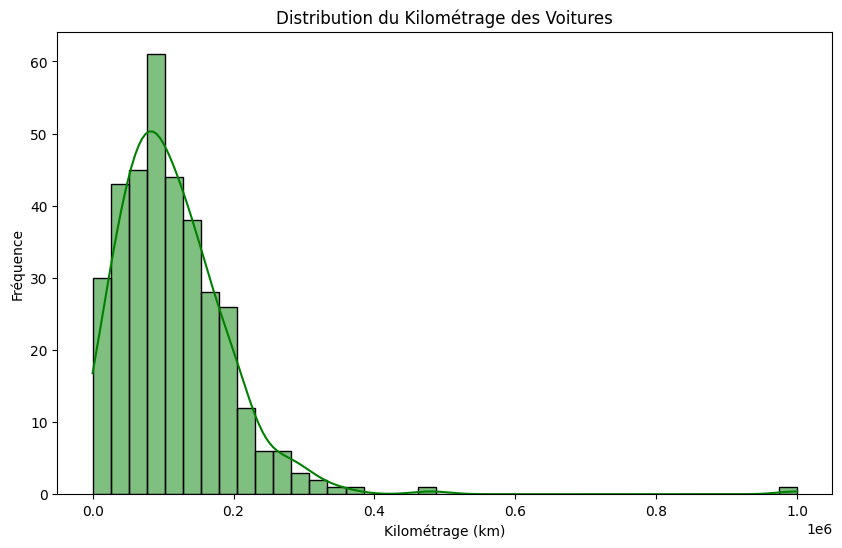

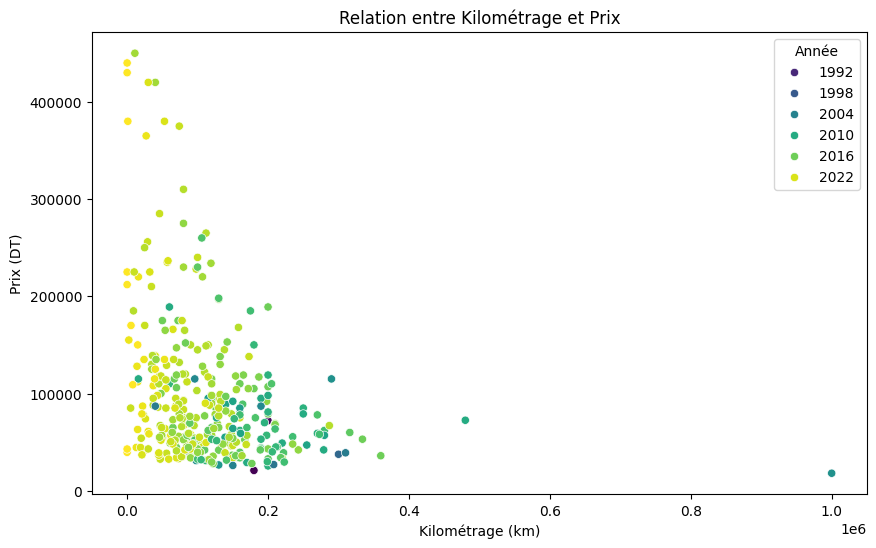

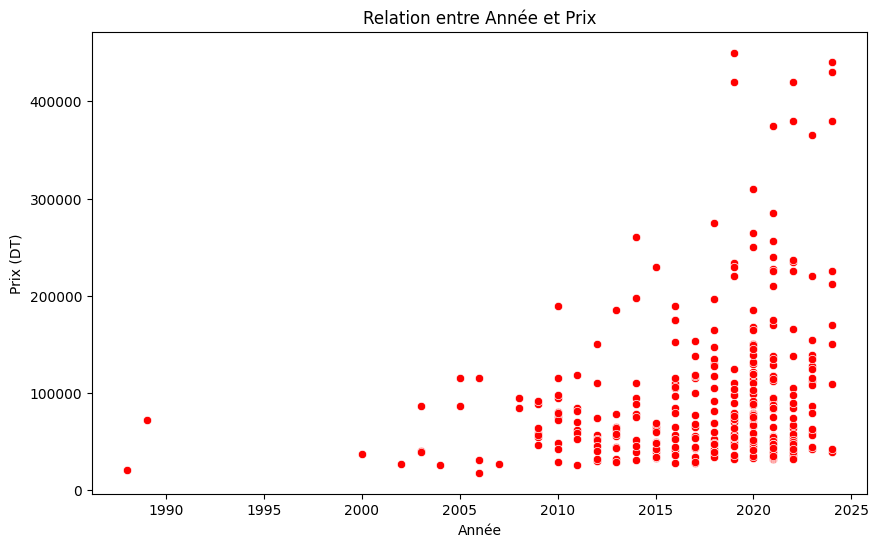

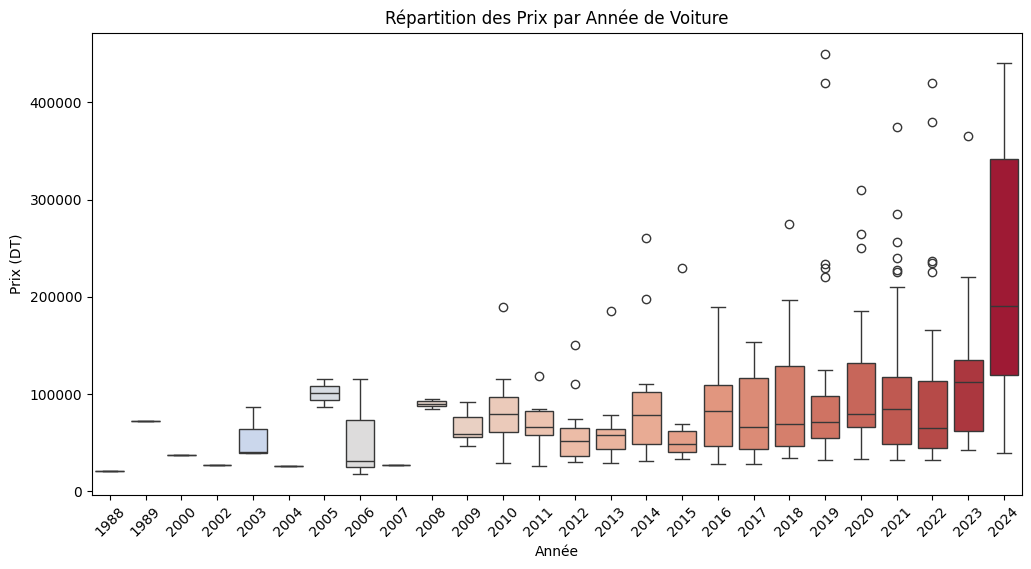

KeyboardInterrupt: 

In [91]:
# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Prix'], kde=True, color='blue')
plt.title('Distribution des Prix des Voitures')
plt.xlabel('Prix (DT)')
plt.ylabel('Fréquence')
plt.show()

# Distribution of Kilométrage
plt.figure(figsize=(10, 6))
sns.histplot(df['Kilométrage'], kde=True, color='green')
plt.title('Distribution du Kilométrage des Voitures')
plt.xlabel('Kilométrage (km)')
plt.ylabel('Fréquence')
plt.show()

# Scatterplot: Relationship between Mileage and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Kilométrage', y='Prix', hue='Année', palette='viridis')
plt.title('Relation entre Kilométrage et Prix')
plt.xlabel('Kilométrage (km)')
plt.ylabel('Prix (DT)')
plt.show()

# Scatterplot: Relationship between Year and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Année', y='Prix', color='red')
plt.title('Relation entre Année et Prix')
plt.xlabel('Année')
plt.ylabel('Prix (DT)')
plt.show()

# Boxplot: Price by Year of Car
plt.figure(figsize=(12, 6))
sns.boxplot(x='Année', y='Prix', data=df, hue='Année', palette='coolwarm', legend=False)
plt.title('Répartition des Prix par Année de Voiture')
plt.xlabel('Année')
plt.ylabel('Prix (DT)')
plt.xticks(rotation=45)
plt.show()

# Boxplot: Price by Mileage categories (binned)
df['Mileage_Category'] = pd.cut(df['Kilométrage'], bins=[0, 50000, 100000, 150000, 200000, float('inf')], 
                                labels=['0-50k', '50-100k', '100-150k', '150-200k', '200k+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Mileage_Category', y='Prix', data=df, hue='Mileage_Category', palette='muted', legend=False)
plt.title('Répartition des Prix par Catégorie de Kilométrage')
plt.xlabel('Catégorie de Kilométrage')
plt.ylabel('Prix (DT)')
plt.show()

# Pairplot for key numerical features
plt.figure()
sns.pairplot(df[['Prix', 'Kilométrage', 'Année']], diag_kind='kde', corner=True)
plt.suptitle('Pairplot des Caractéristiques Clés', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Prix', 'Kilométrage', 'Année']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation entre les Variables')
plt.show()

# Countplot: Number of Cars by Year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Année', hue='Année', palette='crest', legend=False)
plt.title('Nombre de Voitures par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Voitures')
plt.xticks(rotation=45)
plt.show()

# Boxplot: Price by Boîte de Vitesses (Transmission type)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Boite_de_vitesses', y='Prix', data=df, hue='Boite_de_vitesses', palette='muted', legend=False)
plt.title('Répartition des Prix par Boîte de Vitesses')
plt.xlabel('Boîte de Vitesses')
plt.ylabel('Prix (DT)')
plt.show()



In [22]:
# Data Encoding

cars_dataset.replace({'Carburant':{'Essence':0,'Diesel':1, 'Hybride':2}},inplace=True)

cars_dataset.replace({'Boite_de_vitesses':{'Manuelle':0,'Automatique':1}},inplace=True)

label_encoders = {}
for col in ['Marque', 'Modèle']:
    le = LabelEncoder()
    cars_dataset[col] = le.fit_transform(cars_dataset[col])
    label_encoders[col] = le

C:\Users\amine\AppData\Local\Temp\ipykernel_21588\2108697453.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_dataset.replace({'Carburant':{'Essence':0,'Diesel':1, 'Hybride':2}},inplace=True)
C:\Users\amine\AppData\Local\Temp\ipykernel_21588\2108697453.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_dataset.replace({'Boite_de_vitesses':{'Manuelle':0,'Automatique':1}},inplace=True)


In [23]:
cars_dataset.head()

,Marque,Modèle,Prix,Kilométrage,Année,Carburant,Boite_de_vitesses
0,22,47,119000.0,70000.0,2017,0,1
1,25,150,107000.0,200000.0,2016,0,1
2,7,85,45000.0,211000.0,2012,1,0
3,26,223,63000.0,14924.0,2023,0,0
4,33,123,75000.0,75000.0,2020,0,0


Splitting the data into Training data and Test Data

In [24]:
X = cars_dataset.drop(['Prix'],axis=1)
Y = cars_dataset['Prix']

In [25]:
print(X)

     Marque  Modèle  Kilométrage  Année  Carburant  Boite_de_vitesses
0        22      47      70000.0   2017          0                  1
1        25     150     200000.0   2016          0                  1
2         7      85     211000.0   2012          1                  0
3        26     223      14924.0   2023          0                  0
4        33     123      75000.0   2020          0                  0
..      ...     ...          ...    ...        ...                ...
342      26     144     160000.0   2015          0                  0
343      34     166     290000.0   2006          1                  1
344      14     226          0.0   2024          2                  1
345       3     216      48000.0   2022          0                  1
346      23      63     115000.0   2020          1                  1

[347 rows x 6 columns]


In [26]:
print(Y)

0      119000.0
1      107000.0
2       45000.0
3       63000.0
4       75000.0
         ...   
342     33900.0
343    115000.0
344    212000.0
345     52000.0
346    150000.0
Name: Prix, Length: 347, dtype: float64


In [27]:
# Standardization (Z-score scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Alternative: Normalization (Min-Max scaling)
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

Splitting the Data into Train and Test 

In [29]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.1, random_state=2)

Model Trainning

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


In [31]:
#function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    return mse, r2, mae


In [32]:
# Create a function to plot Actual vs Predicted Prices for each model
def plot_actual_vs_predicted(model, X_train, X_test, y_train, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Create a scatter plot for actual vs predicted prices
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='red', alpha=0.6, label='Predicted Prices')
    plt.scatter(y_test, y_test, color='blue', alpha=0.6, label='Actual Prices')
    
    # Add the perfect prediction line
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect Prediction')
    
    # Adding titles and labels
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

1. Linear Regression

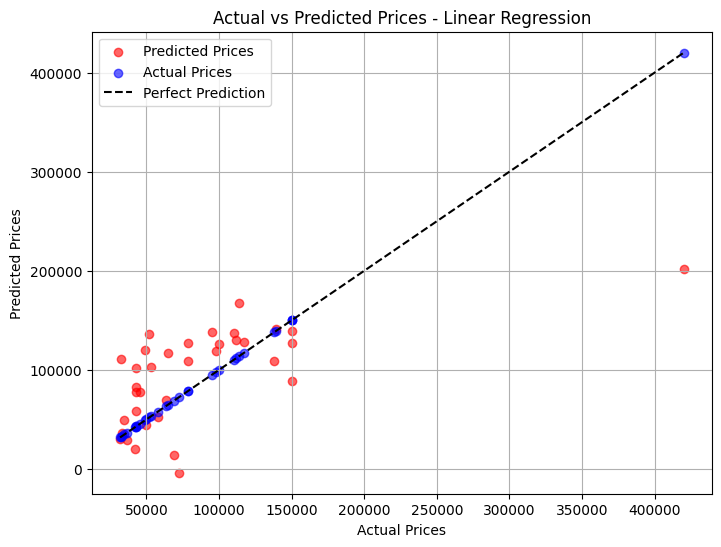

In [33]:
lr_model = LinearRegression()
lr_mse, lr_r2, lr_mae = evaluate_model(lr_model, X_train, X_test, Y_train, Y_test)
plot_actual_vs_predicted(lr_model, X_train, X_test, Y_train, Y_test, 'Linear Regression')

2. Polynomial Regression

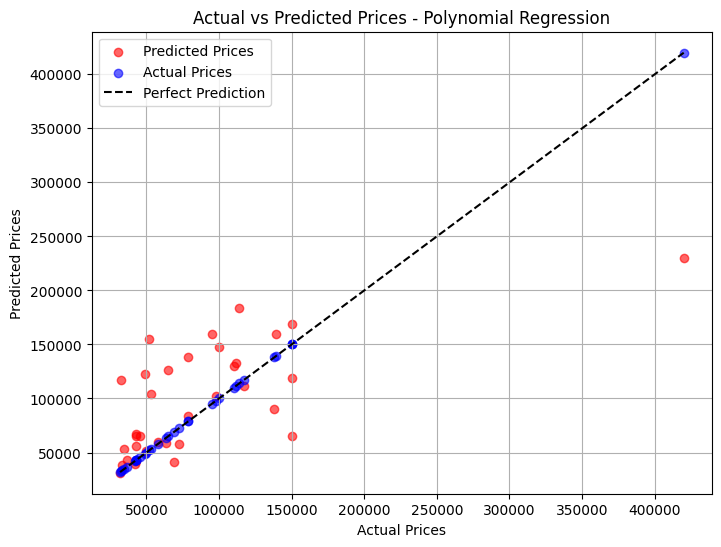

In [34]:
# Transform features into polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_mse, poly_r2, poly_mae = evaluate_model(poly_model, X_train_poly, X_test_poly, Y_train, Y_test)
plot_actual_vs_predicted(poly_model, X_train_poly, X_test_poly, Y_train, Y_test, 'Polynomial Regression')


3. Ridge Regression

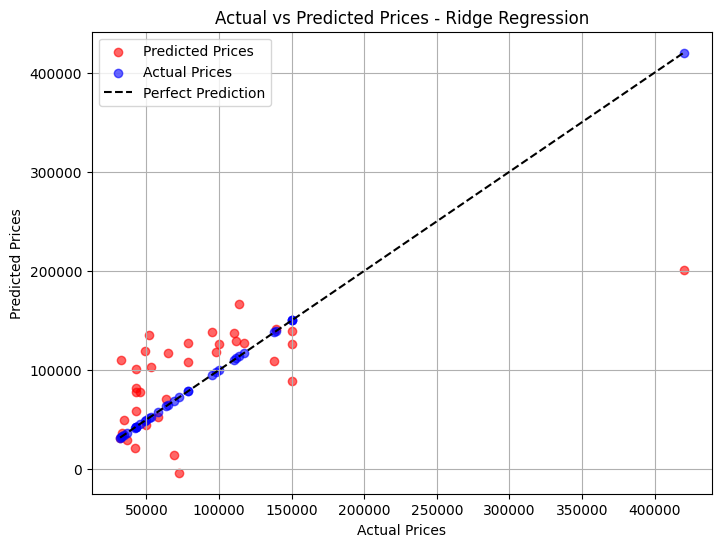

In [35]:
ridge_model = Ridge(alpha=1)
ridge_mse, ridge_r2, ridge_mae = evaluate_model(ridge_model, X_train, X_test, Y_train, Y_test)
plot_actual_vs_predicted(ridge_model, X_train, X_test, Y_train, Y_test, 'Ridge Regression')


4. Lasso Regression

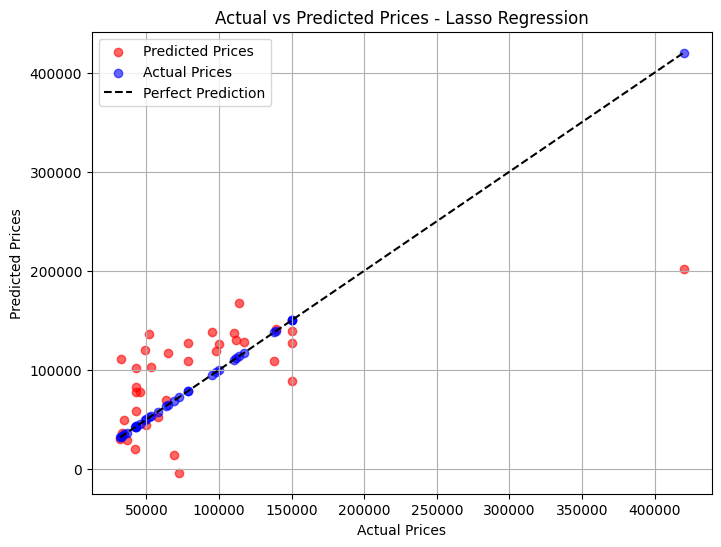

In [36]:
lasso_model = Lasso(alpha=0.1)
lasso_mse, lasso_r2, lasso_mae = evaluate_model(lasso_model, X_train, X_test, Y_train, Y_test)
plot_actual_vs_predicted(lasso_model, X_train, X_test, Y_train, Y_test, 'Lasso Regression')

5. Elastic Regression

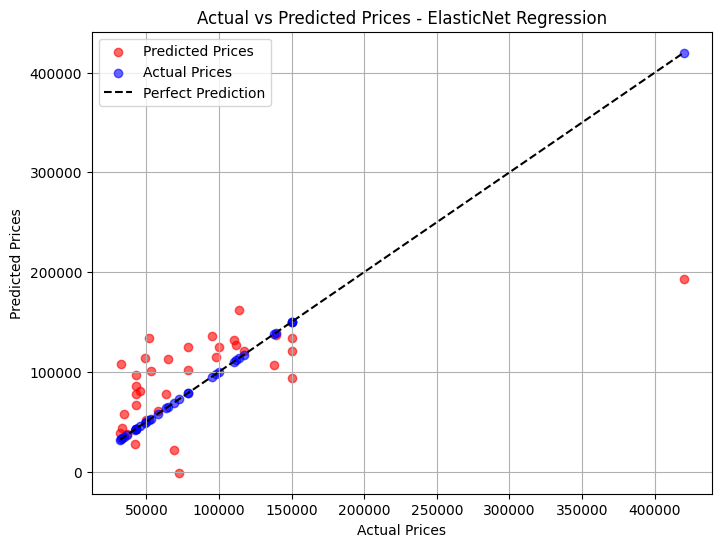

In [37]:
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_mse, elasticnet_r2, elasticnet_mae = evaluate_model(elasticnet_model, X_train, X_test, Y_train, Y_test)
plot_actual_vs_predicted(elasticnet_model, X_train, X_test, Y_train, Y_test, 'ElasticNet Regression')

6. Random Forest

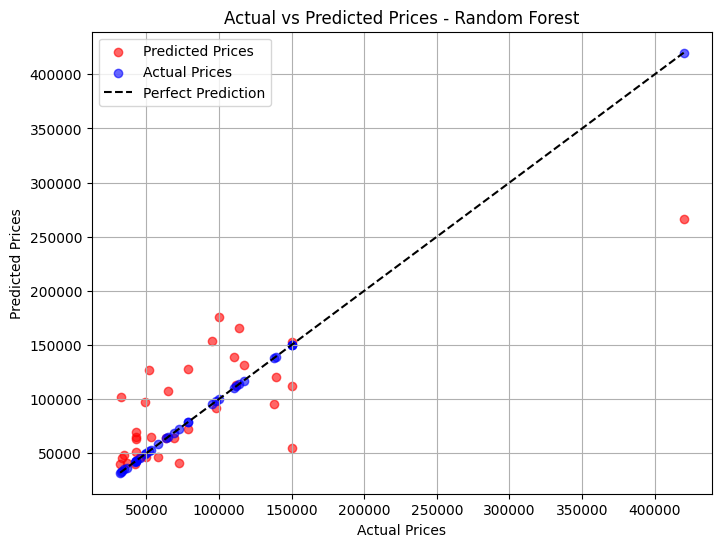

In [38]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse, rf_r2, rf_mae = evaluate_model(rf_model, X_train, X_test, Y_train, Y_test)
plot_actual_vs_predicted(rf_model, X_train, X_test, Y_train, Y_test, 'Random Forest')


7. XGBoost

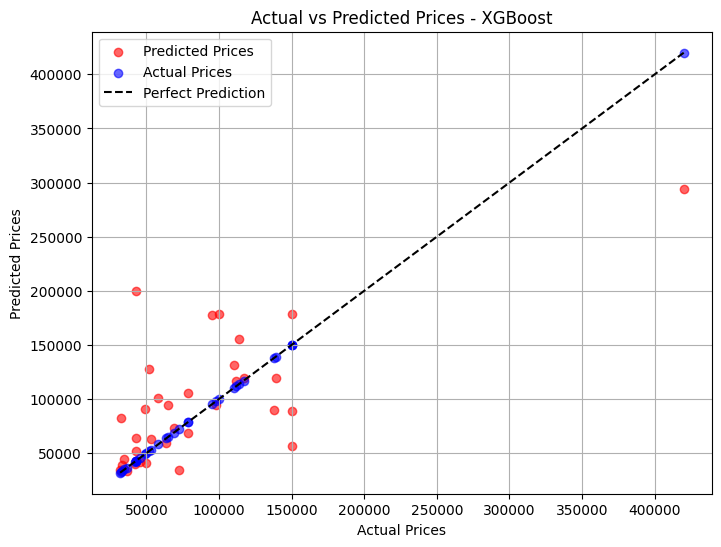

In [39]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_mse, xgb_r2, xgb_mae = evaluate_model(xgb_model, X_train, X_test, Y_train, Y_test)
plot_actual_vs_predicted(xgb_model, X_train, X_test, Y_train, Y_test, 'XGBoost')


Compile results into a DataFrame

In [40]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'Random Forest', 'XGBoost'],
    'MSE': [lr_mse, poly_mse, ridge_mse, lasso_mse, elasticnet_mse, rf_mse, xgb_mse],
    'R²': [lr_r2, poly_r2, ridge_r2, lasso_r2, elasticnet_r2, rf_r2, xgb_r2],
    'MAE': [lr_mae, poly_mae, ridge_mae, lasso_mae, elasticnet_mae, rf_mae, xgb_mae]
})

# Display results
results.sort_values(by='MSE', ascending=True, inplace=True)
results


,Model,MSE,R²,MAE
5,Random Forest,1.984813e+09,0.577874,30245.504762
6,XGBoost,2.497943e+09,0.468743,33341.808817
1,Polynomial Regression,2.741887e+09,0.416862,35160.739330
4,ElasticNet Regression,2.937795e+09,0.375196,37273.458592
2,Ridge Regression,2.961532e+09,0.370148,37987.250276
0,Linear Regression,2.967196e+09,0.368943,38118.191004
3,Lasso Regression,2.967198e+09,0.368943,38118.147125


Visualize the performance

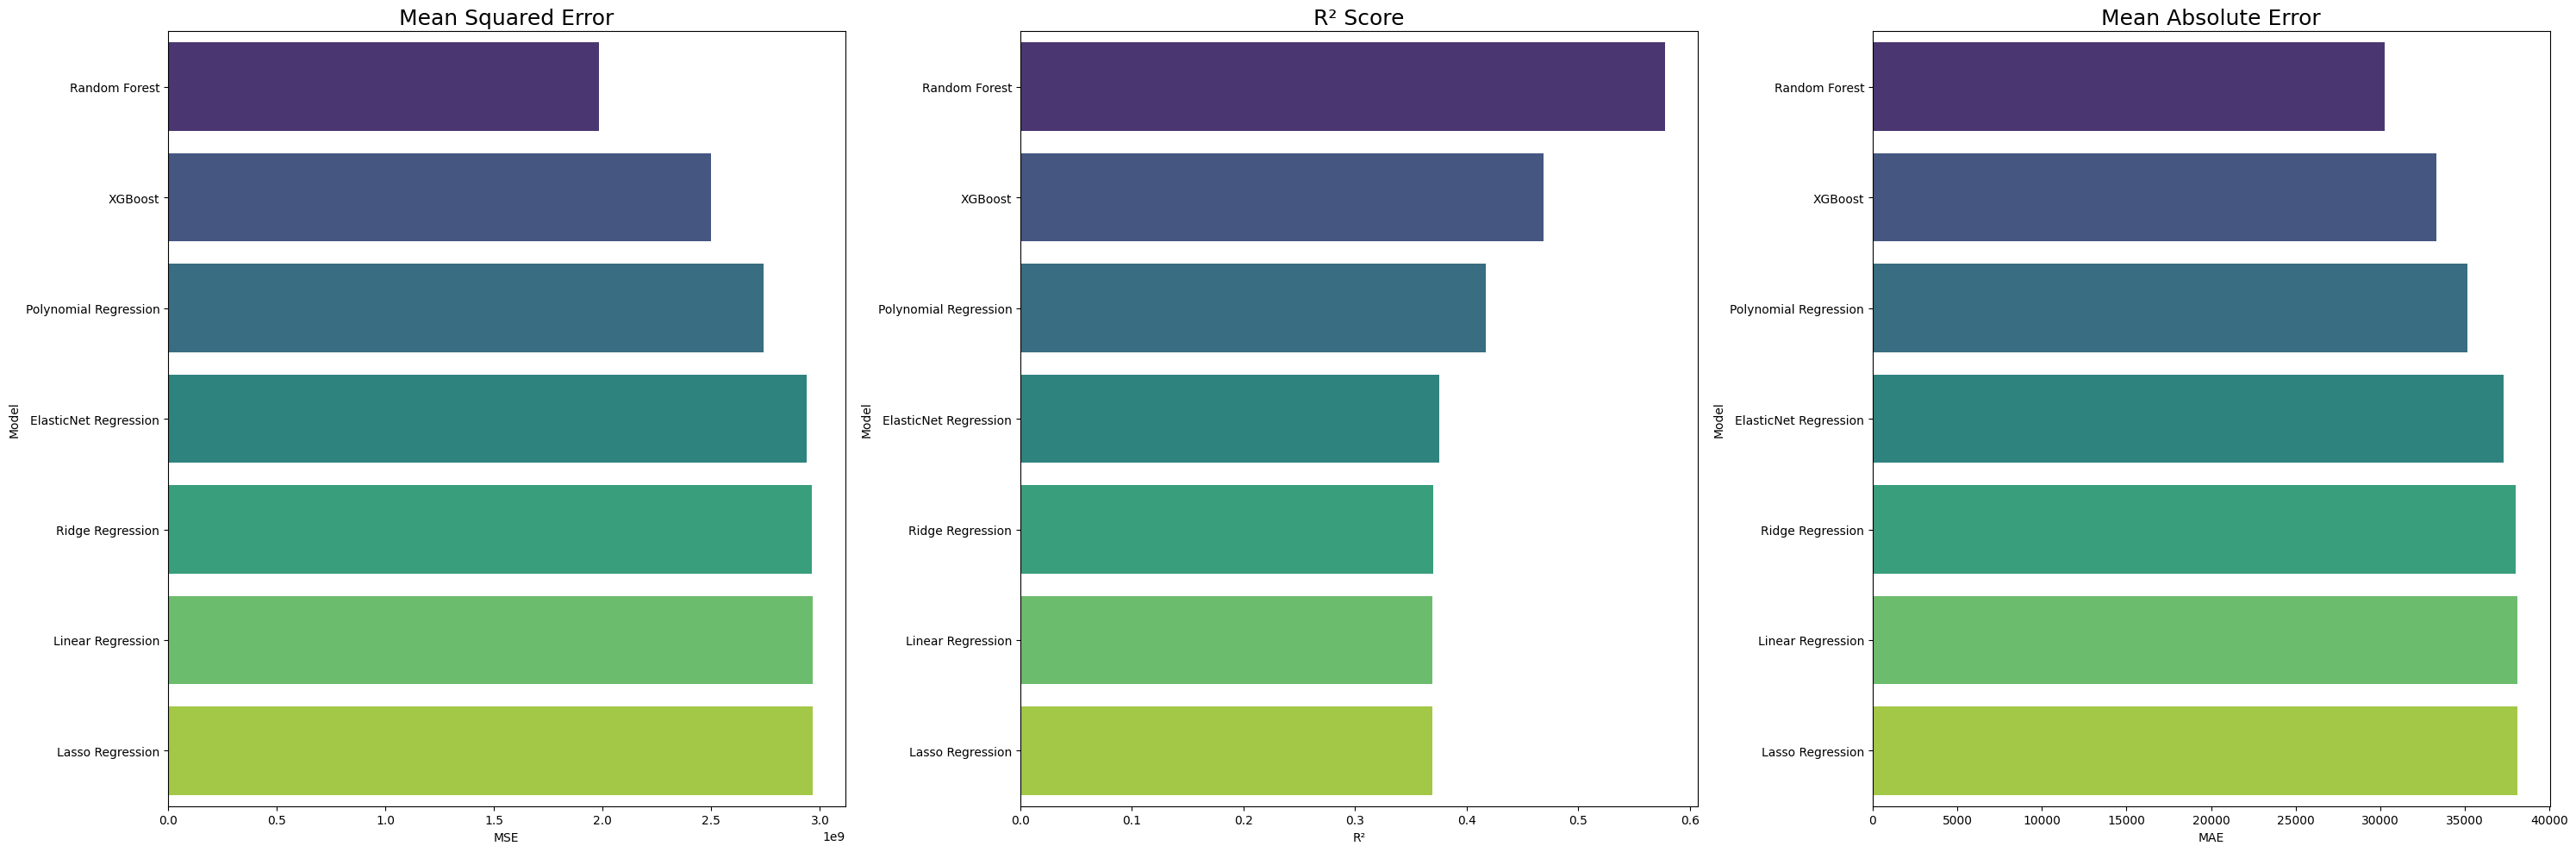

In [41]:
# Plotting MSE, R², and MAE scores for each model
fig, ax = plt.subplots(1, 3, figsize=(30, 10))  # Increased size for a larger plot

# MSE Plot with 'viridis' palette and hue set to 'Model'
sns.barplot(x='MSE', y='Model', data=results, ax=ax[0], palette='viridis', hue='Model')
ax[0].set_title('Mean Squared Error', fontsize=18)

# R² Plot with 'viridis' palette and hue set to 'Model'
sns.barplot(x='R²', y='Model', data=results, ax=ax[1], palette='viridis', hue='Model')
ax[1].set_title('R² Score', fontsize=18)

# MAE Plot with 'viridis' palette and hue set to 'Model'
sns.barplot(x='MAE', y='Model', data=results, ax=ax[2], palette='viridis', hue='Model')
ax[2].set_title('Mean Absolute Error', fontsize=18)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Code to Determine and Print the Best Model Based on Performance

In [42]:
# Assuming `results` is your DataFrame containing MSE, R², and MAE columns

# Find the best model based on each metric
best_mse_model = results.loc[results['MSE'].idxmin()]  # Model with the lowest MSE
best_r2_model = results.loc[results['R²'].idxmax()]  # Model with the highest R²
best_mae_model = results.loc[results['MAE'].idxmin()]  # Model with the lowest MAE

# Print the best models based on each metric
print(f"Best Model based on MSE (Lower is better): {best_mse_model['Model']} with MSE = {best_mse_model['MSE']}")
print(f"Best Model based on R² (Higher is better): {best_r2_model['Model']} with R² = {best_r2_model['R²']}")
print(f"Best Model based on MAE (Lower is better): {best_mae_model['Model']} with MAE = {best_mae_model['MAE']}")


Best Model based on MSE (Lower is better): Random Forest with MSE = 1984812754.3365078
Best Model based on R² (Higher is better): Random Forest with R² = 0.5778744917627301
Best Model based on MAE (Lower is better): Random Forest with MAE = 30245.504761904765


Make the model a pickle file and Save the preprocessing pipeline

In [4]:
# Function to clean the 'Kilométrage' column
def clean_mileage(mileage):
    try:
        # Remove 'km', spaces, and non-numeric characters, then convert to float
        return float(''.join(filter(str.isdigit, mileage)))
    except Exception as e:
        print(f"Error cleaning mileage: {e}")  # Optional: log the error
        return None  # Return None for malformed values


def clean_year(year):
    try:
        # Convert to integer
        return int(year)
    except:
        return None
    
# Function to handle unseen labels
def handle_unknown_label(encoder, value):
    try:
        # Attempt to transform the value using the fitted encoder
        return encoder.transform([value])[0]
    except KeyError:
        # If value not found, return a default value (-1 or other)
        return -1  # Default value for unknown labels

# Preprocessing function with unseen label handling
def preprocess_single_input(new_inputs, label_encoders):
    # Clean the input fields
    new_inputs['Kilométrage'] = clean_mileage(new_inputs['Kilométrage'])
    new_inputs['Année'] = clean_year(new_inputs['Année'])

    # Convert categorical columns using the pre-fitted label encoders
    if 'Marque' in new_inputs:
        new_inputs['Marque'] = handle_unknown_label(label_encoders['Marque'], new_inputs['Marque'])

    if 'Modèle' in new_inputs:
        new_inputs['Modèle'] = handle_unknown_label(label_encoders['Modèle'], new_inputs['Modèle'])

    # Convert 'Carburant' and 'Boite_de_vitesses' manually as done during preprocessing
    carburant_map = {'Essence': 0, 'Diesel': 1, 'Hybride': 2}
    boite_map = {'Manuelle': 0, 'Automatique': 1}
    
    new_inputs['Carburant'] = carburant_map.get(new_inputs['Carburant'], -1)  # Use -1 for unknown
    new_inputs['Boite_de_vitesses'] = boite_map.get(new_inputs['Boite_de_vitesses'], -1)  # Use -1 for unknown

    # Convert to DataFrame for prediction
    df_input = pd.DataFrame([new_inputs])

    return df_input




new_inputs = {
    'Marque': 'Peugeot',
    'Modèle': '208',
    'Kilométrage': '11000KM',
    'Année': '2020',
    'Carburant': 'Essence',
    'Boite_de_vitesses': 'Manuelle'
}

# Preprocess the input
processed_input = preprocess_single_input(new_inputs, label_encoders)

# At this point, you can use the processed input for prediction
print(processed_input)


NameError: name 'label_encoders' is not defined

Load the Model and Test with New Inputs

In [106]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import pickle




# Create the pipeline
pipeline = Pipeline(steps=[
    ('model', xgb_model)
])

# Save the pipeline and label encoders
with open('cars_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, , f)

print("Pipeline and label encoders saved to 'cars_pipeline.pkl'.")


Pipeline and label encoders saved to 'cars_pipeline.pkl'.


In [107]:
# Load the saved pipeline and label encoders
with open('cars_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)


# Define new test input values
new_inputs = {
    'Marque': 'Peugeot',
    'Modèle': '208',
    'Kilométrage': '11000KM',
    'Année': '2018',
    'Carburant': 'Essence',
    'Boite_de_vitesses': 'Manuelle'
}

# Preprocess the input
processed_input = preprocess_single_input(new_inputs, label_encoders)

# At this point, you can use the processed input for prediction
print(processed_input)

# Predict the price
predicted_price = loaded_pipeline.predict(processed_input)

# Display the prediction
print(f"Predicted car price: ${predicted_price[0]:.2f}")


c:\Users\amine\Desktop\ml_project\venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'